##### 1. 문제 정의
- KNN 모델(K - Nearest Neighbors) : 유유상종의 개념과 비슷 (끼리끼리)
  - 새로운 데이터가 들어왔을 때 거리 계산을 통해서 가장 가까운 특성의 데이터로 예측하는 모델
- KNN 모델의 이웃의 숫자를 조정해보자(n_neighbors 개수 조정, 하이퍼 파라미터 튜닝) - 일반화가 이루어지는 방향으로 조정
- 붓꽃 데이터 활용
  - 특성 4개 : 꽃잎의 길이, 꽃잎의 너비, 꽃받침의 길이, 꽃받침의 너비
  - 정답 데이터 : 클래스 3개(정답 3개) - 붓꽃의 3가지 품종 (setosa, versicolor, virginica)으로 이루어져 있음
- 목표 : 특성 데이터 4개를 통해 붓꽃의 품종을 예측하는 모델

In [2]:
# 도구 불러오기

# 표 데이터를 사용할 수 있는 라이브러리
import pandas as pd   
# EDA : 시각화
import matplotlib.pyplot as plt   
# 머신러닝 라이브러리
from sklearn.neighbors import KNeighborsClassifier
# 정확도 측정하는 모델(도구)
from sklearn.metrics import accuracy_score
# 사이킷 런에서 제공하는 붓꽃 데이터 라이브러리 가져오기
from sklearn.datasets import load_iris

In [3]:
# iris_data 변수에 데이터 셋 담아주기
iris_data = load_iris()
iris_data

# 아래 'data'의 속성들은 내가 앞으로 사용해야 할 문제 데이터
# 'target'(키값)에는 정답 데이터가 들어있는 속성들

# iris_Data : {} <- 번치 객체, Python에서 dictionary와 비슷한 자료 구조
# 번치 객체(bunch) : 묶음, 다발이라는 의미 - 머신러닝 데이터 셋 구조
# 딕셔너리처럼 사용해주면 된다!

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# iris 데이터 셋의 키값 확인하기
iris_data.keys()   # 번치 객체 키값 열어보는 함수
# DESCR : describe(기술통계량) - 기술통계량을 확인했던 내용이 담겨있음
# describe를 통해서 평균값과 중앙값(중위값)을 확인 가능

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# iris_data의 특성 4개의 이름 확인하기
iris_data['feature_names']
# sepal length : 꽃받침의 길이
# sepal width : 꽃받침의 너비
# petal length : 꽃잎의 길이
# petal width : 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##### 일반화
- 어떤 데이터를 적용시켜도 정확도(점수)가 높은 모델
##### 과대적합
- 하나의 데이터에 대해 너무 많이 학습을 train 정확도가 높음
, test 데이터 정확도가 낮은?
##### 과소적합
- 전체적으로 너무 학습 데이터가 적음
- tain / test 데이터 정도가 낮은?

In [9]:
# 문제 데이터 가져오기
iris_data['data']   # 문제 데이터가 array 형태로 들어가있음
# 문제 데이터 5개(0~4)만 가져오기
iris_data['data'][ :5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
# 정답 데이터 가져오기
iris_data['target']
# setosa = 0 
# versicolor = 1
# virginica = 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# '0, 1, 2'의 진짜 꽃 이름을 확인해보자(품종 확인)
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### 데이터 셋이 어떻게 생긴 지 모르는 상태니까 이제 데이터를 살펴보는 작업 진행

In [13]:
# 기술 통계량 확인
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 실습) 데이터 셋 구성하기
- 데이터 셋이 판다스처럼 되어있는 지 확인해봤더니 번치 객체 형태로 되어있음
- 문제 데이터를 DataFrame화 시키기 ( 정답 데이터는 어차피 1차원이기에 그대로 사용할 예정)
- X, y에 저장
- 훈련, 테스트 데이터 세트 분리는 선생님과 같이 진행할 예정

In [21]:
# 문제 데이터 DataFrame으로 만들어주기 - 표 형태?(pd.DataFrame(iris_data['data'])
# 조건, 컬럼 명 주기 - feature_names에 접근하기
X = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
# 정답 데이터를 y변수에 담아주기
y = iris_data['target']   # y에 target 키값 저장

In [23]:
# 문제 데이터와 정답 데이터의 크기 확인하기
print("문제 데이터의 크기 : ", X.shape)
print("정답 데이터의 크기 : ", y.shape)

문제 데이터의 크기 :  (150, 4)
정답 데이터의 크기 :  (150,)


In [25]:
# train, test 분리 작업
# 앞에서 했었던 실습처럼 위에서부터 70%의 데이터를 추출하면 과대적합의 위험이 있다!
# 과대적합은 훈련 데이터에 대해서는 잘 맞추지만 테스트 데이터에 대해서는 잘 맞추지 못하는 현상이 나타나는 것

# 랜덤 샘플링 진행 - sklearn 내부에 랜덤 샘플링이라는 도구가 있음

In [27]:
# 데이터 분리 도구 가져오기 (랜덤 샘플링)
from sklearn.model_selection import train_test_split # 데이터 분리 도구

In [31]:
# train_test_split() 함수 : 알아서 훈련용과 테스트용 데이터로 나누어주는 도구(랜덤 샘플링 작업도 가능)
# train_test_split(문제 데이터, 정답 데이터, 테스트 데이터의 비율(0.3), 랜덤 샘플링 작업 코드)
# 소수점으로 작성하면 퍼센트, 정수로 쓰면 데이터의 개수 의미
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)   # X, y의 순서 중요

In [32]:
# random_state를 사용하여 랜덤 샘플링 고정
# train_test_split()의 기능 2가지
# 1) train, test 분리
# 2) random sampling (랜덤 샘플링)
# 랜덤 샘플링이 계속 돼버리면 학습 데이터가 변경되므로 하이퍼 파라미터 조정의 의미가 없어진다
# 랜덤 수 고정 (수행 시마다 동일한 결과를 얻기 위해 적용)
# 랜덤 수는 큰 의미는 없고, 내부적으로 규칙을 가지는 숫자임

In [33]:
y_train

array([0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2,
       1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0,
       1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1])

In [35]:
# 문제 데이터 확인
X_train
# 랜덤 샘플링 단점
# - 모델에 영향을 주는 건 하이퍼 파라미터가 되어야 하는데 데이터가 계속 변경되어버리면 어떤 하이퍼 파라미터 정확도가 더 좋은 하이퍼 파라미터인지 확인하기 어려움
# random_state = 8 , 하이퍼 파라미터가 8 
# 12 ---> 15

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
49,5.0,3.3,1.4,0.2
43,5.0,3.5,1.6,0.6
40,5.0,3.5,1.3,0.3
139,6.9,3.1,5.4,2.1
111,6.4,2.7,5.3,1.9
...,...,...,...,...
83,6.0,2.7,5.1,1.6
136,6.3,3.4,5.6,2.4
133,6.3,2.8,5.1,1.5
105,7.6,3.0,6.6,2.1


In [37]:
# 데이터 크기 확인 
print('훈련용 문제 : ', X_train.shape)
print('훈련용 답: ',y_train.shape)
print('테스트용 문제: ',X_test.shape)
print('테스트용 답: ',y_test.shape)
# 데이터의 개수가 같은 지 , 훈련용/ 테스트용 문제가 같은 지 확인 해야함 / 같지 않으면 결측치가 있을 가능성 높음

훈련용 문제 :  (105, 4)
훈련용 답:  (105,)
테스트용 문제:  (45, 4)
테스트용 답:  (45,)


## 모델링
- 모델 선택

In [61]:
# 모델 객체 생성(모델의 이름 : knn_model)
# 하이퍼 파라미터 조정 X
knn_model = KNeighborsClassifier(n_neighbors = 8)
# knn_model = KNeighborsClassifier(하이퍼 파라미터(n_neighbors)를 확인 하고 싶다면 shift tap 눌러서 확인)

In [57]:
# 모델 학습 
# fit (학습용 문제, 학습용 정답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [58]:
# 모델이 예측한 값 - 실제 정답은 아님
# predict(테스트용 문제) - pre라는 변수에 담기
pre = knn_model.predict(X_test)
pre

array([0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0,
       1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1,
       2])

#### 모델 평가

In [59]:
# 모델 평가 - 예측 정답과 실제 정답이 같은 지의 정확도
# 모델이 예측한 정답(pre)와 실제 정답(y_test) 비교 평가
# accuracy
# accuracy_score(pre, y_test)
accuracy_score(pre, y_test)

0.9777777777777777

- 모델이 자체적으로 제공하는 정확도 확인 방법

In [60]:
# score
# model.score(X_test, y_test)
knn_model.score(X_test, y_test)
# 예측 단계를 내부적으로 진행하고 바로 정확도를 확인할 수 있는 방법 - 위와 결과값은 동일(이거는 pre를 알 수 없다)

0.9777777777777777

### train 데이터와 test 데이터의 정확도 구하기
- 하이퍼 파라미터 값에 따른 정확도들을 list에다가 저장(n_neighbors)

In [68]:
train_list = []   # train 데이터의 정확도가 담길 리스트
test_list = []   # test 데이터의 정확도가 담길 리스트
# n_neighbors 1 ~ 50
for i in range(1, 50, 1) : # 1부터 50까지 1씩 증가
    knn_model = KNeighborsClassifier(n_neighbors = i)   # i가 1씩 증가됨
    knn_model.fit(X_train, y_train)   # knn_model 학습시키기
    # 모델이 예측한 정답(pre)는 확인할 필요 없기에 score 쓰기
    train_score = knn_model.score(X_train, y_train)    # 점수만 리스트에 append 될 수 있게 하기
    train_list.append(train_score)
    test_score = knn_model.score(X_test, y_test)
    test_list.append(test_score)

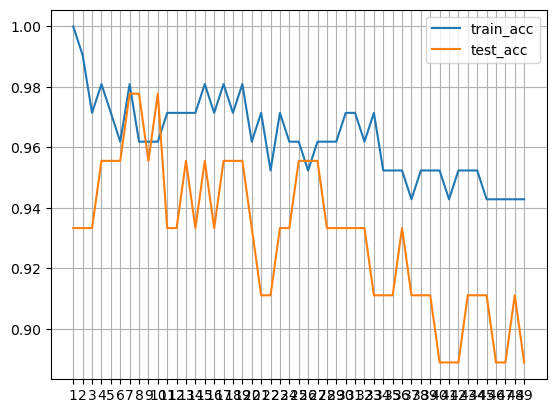

In [67]:
# 그래프를 그려서 확인해보기
# 각각의 하이퍼 파라미터에 따른 훈련 데이터의 정확도(train_list), 테스트 데이터의 정확도를 그래프로 그려서 
# 일반화가 되고있는 지점(하이퍼 파라미터 값)이 어디인지 확인해보기
plt.plot(range(1, 50, 1), train_list, label = 'train_acc')
plt.plot(range(1, 50, 1), test_list, label = 'test_acc')
plt.legend()
plt.grid()   # 눈금선 출력
plt.xticks(range(1, 50 ,1)) # 눈금선의 간격 설정
plt.show()
# 처음엔 과대적합이고 train은 1에 도달했으므로 정확도가 잘 맞음
# 오른쪽 끝에는 train이나 test 둘 다 정확도가 떨어졌으므로 과소적합이 이뤄진 상태
# 하이퍼 파라미터가 8 , 10 일 때는 test 데이터의 정확도가 train 데이터보다 높음 - 신뢰성이 떨어짐
# 하이퍼 파라미터가 7일 때는 정확도가 비슷하지만 train 데이터의 정확도가 더 높아서 7이 신뢰성이 가장 좋음

In [ ]:
# < 모델 복잡도 곡선을 확인해 본 결과 >
# 하이퍼 파라미터가 7, 8, 10 일 때
# test 데이터의 정확도가 가장 높은 걸 확인할 수 있다.
# 8, 10 일 때는 test의 정확도 보다 train의 정확도가 많이 떨어지는 걸 확인할 수 있는데
# 이론상 말이 안 되는 수치라고 볼 수 있다. 즉, 신뢰성이 떨어지는 정확도 이다!!
# 7 일 때는 test와 train의 차이가 미비하다. 그리고 train의 정확도가 조금 더 높은 편이다.
# train의 정확도가 높아야 신뢰성을 높일 수 있다.

# 모델을 생성할 때 현재 우리가 가지고 있는 랜덤 샘플링된 데이터의 적합한 하이퍼 파라미터는 7이라는 걸 알 수 있다.

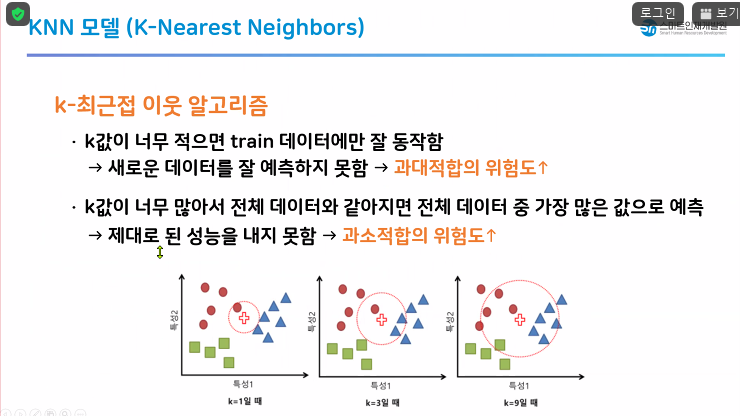
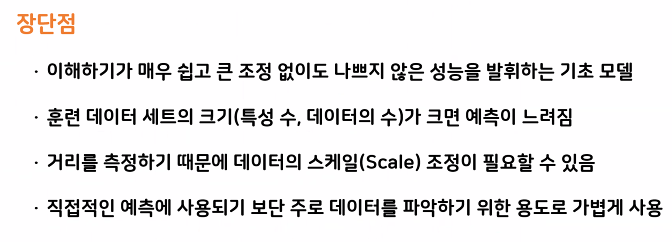